### Data Augmentation

In [ ]:
import random
import csv
import numpy as np

In [ ]:
random.seed(42)
np.random.seed(42)

In [ ]:
# Generate synthetic data
def generate_synthetic_data(n_samples, difficulty_level=0):
    data = []

    for id in range(1, n_samples + 1):
        is_real = id % 2 == 1
        data.append(generate_complaint(id, is_real, difficulty_level))

    random.shuffle(data)
    return data

In [ ]:
# Generate synthetic data for complaints
def generate_complaint(id, is_real, difficulty_level=0):
    if is_real:
        distance_to_hotspot = np.random.normal(3.0 - difficulty_level, 0.7)
        user_frequency = np.random.normal(5.0 - difficulty_level, 1.5)
    else:
        distance_to_hotspot = np.random.normal(1.0 + difficulty_level, 0.7)
        user_frequency = np.random.normal(3.0 + difficulty_level, 1.5)

    time_since_incident = np.random.randint(1, 30)
    num_reports_in_same_location = np.random.randint(1, 11)
    avg_report_length = np.random.randint(50, 120)
    report_sentiment = np.random.uniform(0.5, 1.0)
    num_social_media_mentions = np.random.randint(1, 6)
    keyword_frequency = np.random.uniform(0.6, 1.0)
    named_entity_count = np.random.randint(1, 4)

    label = 1 if is_real else 0
    return [id, distance_to_hotspot, time_since_incident, num_reports_in_same_location,
            avg_report_length, report_sentiment, num_social_media_mentions, user_frequency,
            keyword_frequency, named_entity_count, label]

In [ ]:
csv_filename = 'complaints.csv'

In [ ]:
n_samples = 8000
difficulty_level = 0.28

In [ ]:
synthetic_data = generate_synthetic_data(n_samples, difficulty_level)

In [ ]:
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    header = ["id", "Distance_to_Hotspot", "Time_Since_Incident", "Num_Reports_In_Same_Location",
              "Avg_Report_Length", "Report_Sentiment", "Num_Social_Media_Mentions", "User_Frequency",
              "Keyword_Frequency", "Named_Entity_Count", "Label"]
    csv_writer.writerow(header)

    for row in synthetic_data:
        csv_writer.writerow(row)

print(f'Data has been saved.')

Data has been saved.


### Data Preparation and Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
import seaborn as sb

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/complaints_final_final.csv")

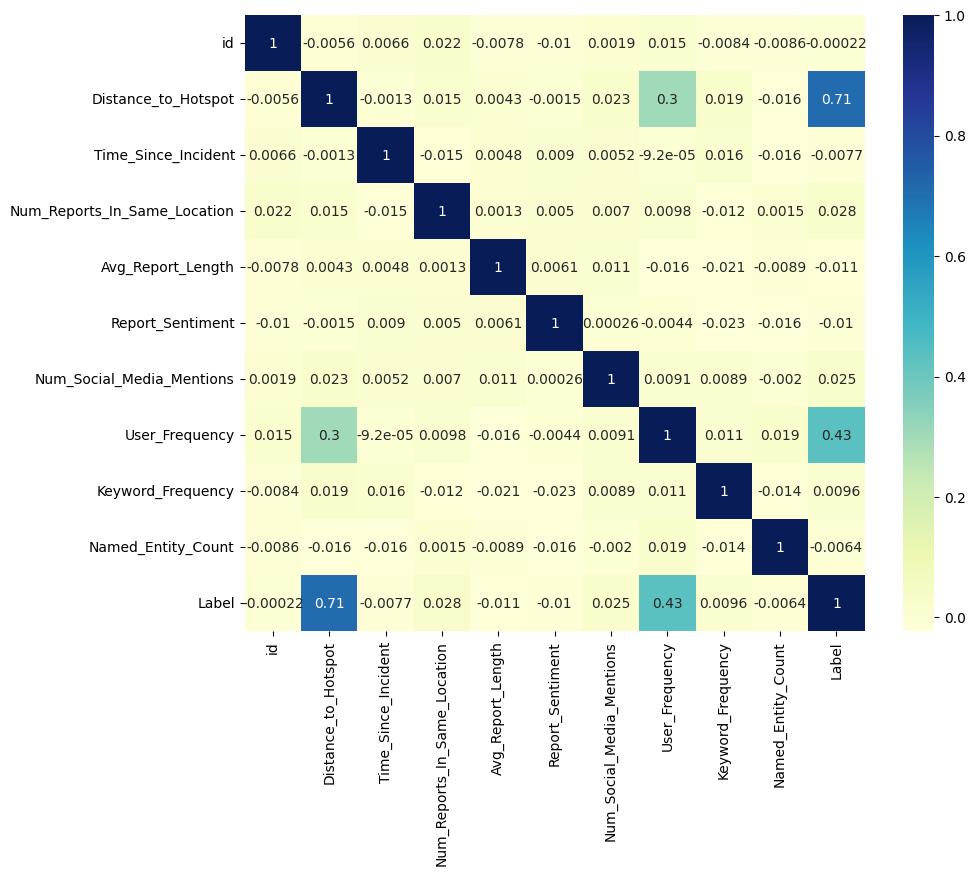

In [ ]:
plt.figure(figsize=(10, 8))

dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

plt.show()

In [ ]:
def remove_outliers_iqr(data, column, iqr_factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [ ]:
columns_to_check = data.columns

In [ ]:
columns_to_check

Index(['id', 'Distance_to_Hotspot', 'Time_Since_Incident',
       'Num_Reports_In_Same_Location', 'Avg_Report_Length', 'Report_Sentiment',
       'Num_Social_Media_Mentions', 'User_Frequency', 'Keyword_Frequency',
       'Named_Entity_Count', 'Label'],
      dtype='object')

In [ ]:
for column in columns_to_check:
    data = remove_outliers_iqr(data, column)

In [ ]:
data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)

In [ ]:
data.head(10)

,id,Distance_to_Hotspot,Time_Since_Incident,Num_Reports_In_Same_Location,Avg_Report_Length,Report_Sentiment,Num_Social_Media_Mentions,User_Frequency,Keyword_Frequency,Named_Entity_Count,Label
0,4202,0.523734,13,5,93,0.872065,5,0.337869,0.660049,1,0
1,2126,1.311774,9,1,111,0.965352,1,3.375718,0.797206,3,0
2,4210,1.131129,4,4,102,0.768575,4,7.343915,0.810987,2,0
3,3260,2.126496,22,1,87,0.759792,4,3.767115,0.688706,3,0
4,36,1.442607,23,2,115,0.719237,3,3.544271,0.786239,3,0
5,7224,2.222832,3,3,104,0.911422,3,5.217956,0.633970,1,0
6,4879,3.347168,23,9,54,0.602460,4,3.295530,0.755595,1,1
7,4286,2.998040,2,8,91,0.888044,3,1.654326,0.897394,2,0
8,1444,1.341669,23,2,110,0.843125,5,2.389562,0.639375,2,0
9,3916,0.959807,16,7,109,0.918149,1,1.614143,0.691481,3,0


In [ ]:
len(data)

7953

In [ ]:
X = data.drop("Label", axis=1)
y = data["Label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(random_state=2)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

In [ ]:
print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")

Random Forest Performance:
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

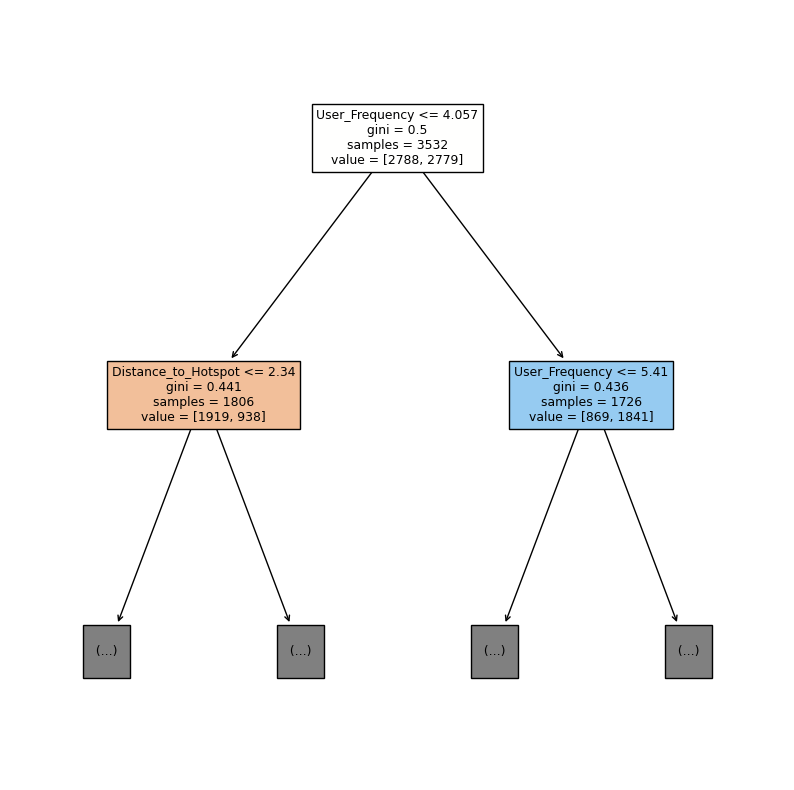

In [ ]:
tree_to_visualize = rf_classifier.estimators_[0]

plt.figure(figsize=(10, 10))
plot_tree(tree_to_visualize, filled=True, feature_names=X_train.columns, max_depth=1)
plt.show()

### Logistic Regression

In [ ]:
lr_classifier = LogisticRegression(max_iter=700)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

In [ ]:
print("Logistic Regression Performance:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1 Score: {lr_f1:.2f}")

Logistic Regression Performance:
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87


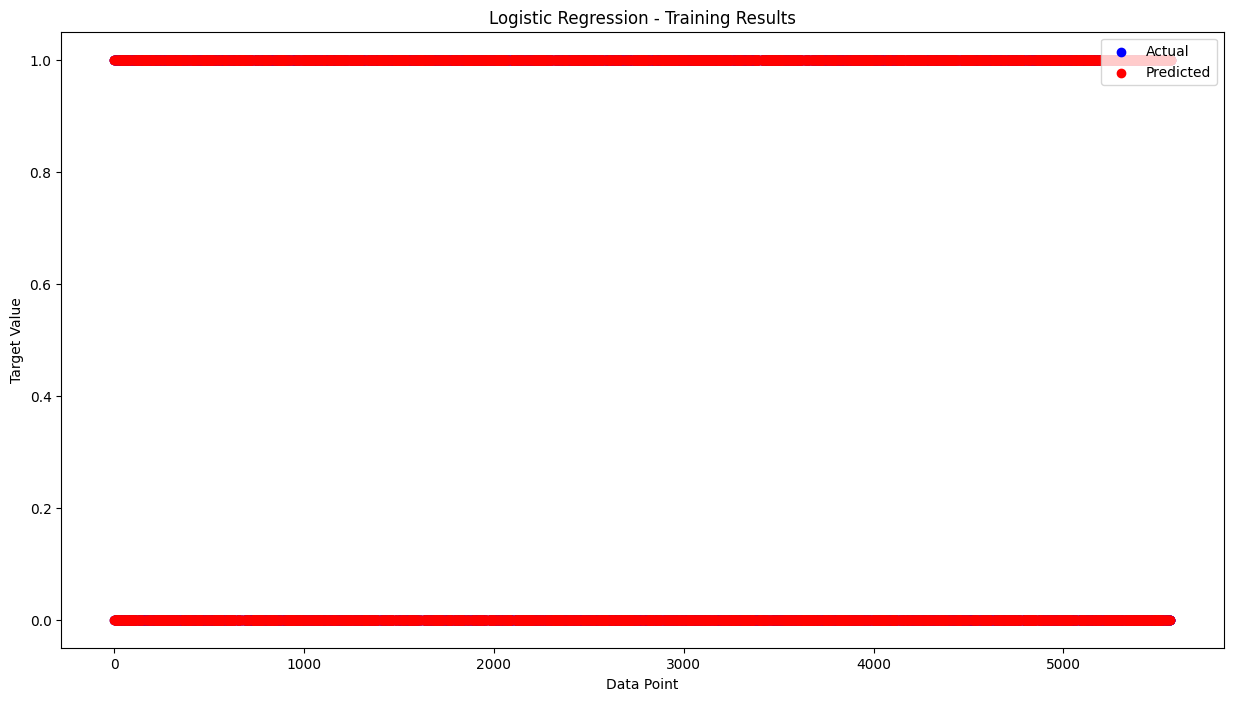

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for training results
plt.figure(figsize=(15, 8))
plt.scatter(range(len(y_train)), y_train, c='blue', label='Actual')
plt.scatter(range(len(y_train)), lr_classifier.predict(X_train), c='red', label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Target Value')
plt.title('Logistic Regression - Training Results')
plt.legend(loc='upper right')
plt.show()

### Naive Bayes

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

In [ ]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

In [ ]:
print("Naive Bayes Performance:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1 Score: {nb_f1:.2f}")

Naive Bayes Performance:
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88


### RandomCV - Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf_random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid_rf, n_iter=100, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

In [ ]:
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   random_state=42, scoring='accuracy')

In [ ]:
rf_random_best_model = rf_random_search.best_estimator_
rf_random_predictions = rf_random_best_model.predict(X_test)

In [ ]:
rf_random_accuracy = accuracy_score(y_test, rf_random_predictions)
rf_random_precision = precision_score(y_test, rf_random_predictions)
rf_random_recall = recall_score(y_test, rf_random_predictions)
rf_random_f1 = f1_score(y_test, rf_random_predictions)

In [ ]:
print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")



print("Random Forest Performance with Randomized Search:")
print(f"Accuracy: {rf_random_accuracy:.2f}")
print(f"Precision: {rf_random_precision:.2f}")
print(f"Recall: {rf_random_recall:.2f}")
print(f"F1 Score: {rf_random_f1:.2f}")

Random Forest Performance:
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
Random Forest Performance with Randomized Search:
Accuracy: 0.87
Precision: 0.86
Recall: 0.88
F1 Score: 0.87


### RandomCV - Logistic Regression

In [ ]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [ ]:
lr_random_search = RandomizedSearchCV(estimator=lr_classifier, param_distributions=param_grid_lr, n_iter=100,scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

In [ ]:
lr_random_search.fit(X_train, y_train)
lr_random_best_model = lr_random_search.best_estimator_
lr_random_predictions = lr_random_best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
lr_random_accuracy = accuracy_score(y_test, lr_random_predictions)
lr_random_precision = precision_score(y_test, lr_random_predictions)
lr_random_recall = recall_score(y_test, lr_random_predictions)
lr_random_f1 = f1_score(y_test, lr_random_predictions)

In [ ]:
print("Logistic Regression Performance:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1 Score: {lr_f1:.2f}")



print("Logistic Regression Performance with Randomized Search:")
print(f"Accuracy: {lr_random_accuracy:.2f}")
print(f"Precision: {lr_random_precision:.2f}")
print(f"Recall: {lr_random_recall:.2f}")
print(f"F1 Score: {lr_random_f1:.2f}")

Logistic Regression Performance:
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
Logistic Regression Performance with Randomized Search:
Accuracy: 0.88
Precision: 0.88
Recall: 0.87
F1 Score: 0.88


### Comparative Analysis for Base and Tuned models

In [ ]:
performance_data = {
    "Algorithm": ["Random Forest", "Logistic Regression", "Naive Bayes"],
    "Original Accuracy": [rf_accuracy, lr_accuracy, nb_accuracy],
    "RandomCV Accuracy": [rf_random_accuracy, lr_random_accuracy, nb_accuracy],

    "Original Precision": [rf_precision, lr_precision, nb_precision],
    "RandomCV Precision": [rf_random_precision, lr_random_precision, nb_precision],


    "Original Recall": [rf_recall, lr_recall, nb_recall],
    "RandomCV Recall": [rf_random_recall, lr_random_recall, nb_recall],

    "RandomCV F1 Score": [rf_random_f1, lr_random_f1, nb_f1],
    "Original F1 Score": [rf_f1, lr_f1, nb_f1],
}

In [ ]:
performance_df = pd.DataFrame(performance_data)

In [ ]:
from IPython.display import display, HTML

display(performance_df)

,Algorithm,Original Accuracy,RandomCV Accuracy,Original Precision,RandomCV Precision,Original Recall,RandomCV Recall,RandomCV F1 Score,Original F1 Score
0,Random Forest,0.866723,0.867142,0.867878,0.863785,0.869313,0.875931,0.869815,0.868595
1,Logistic Regression,0.868399,0.875524,0.867707,0.880000,0.873449,0.873449,0.876712,0.870569
2,Naive Bayes,0.876362,0.876362,0.878939,0.878939,0.876758,0.876758,0.877847,0.877847


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(performance_df, *['Original Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(performance_df, *['RandomCV Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(performance_df, *['Original Precision'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(performance_df, *['RandomCV Precision'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(performance_df, *['Algorithm'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(performance_df, *['Original Accuracy', 'RandomCV Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(performance_df, *['RandomCV Accuracy', 'Original Precision'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(performance_df, *['Original Precision', 'RandomCV Precision'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(performance_df, *['RandomCV Precision', 'Original Recall'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(performance_df, *['Original Accuracy', 'Original Precision', 'Algorithm'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(performance_df, *['Original Accuracy', 'RandomCV Precision', 'Algorithm'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(performance_df, *['Original Accuracy', 'RandomCV Recall', 'Algorithm'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(performance_df, *['Original Accuracy', 'count()', 'Algorithm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(performance_df, *['Original Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(performance_df, *['RandomCV Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(performance_df, *['Original Precision'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(performance_df, *['RandomCV Precision'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(performance_df, *['Original Accuracy', 'Algorithm'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(performance_df, *['RandomCV Accuracy', 'Algorithm'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(performance_df, *['Original Precision', 'Algorithm'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(performance_df, *['RandomCV Precision', 'Algorithm'], **{'inner': 'stick'})
chart

In [ ]:
import numpy as np

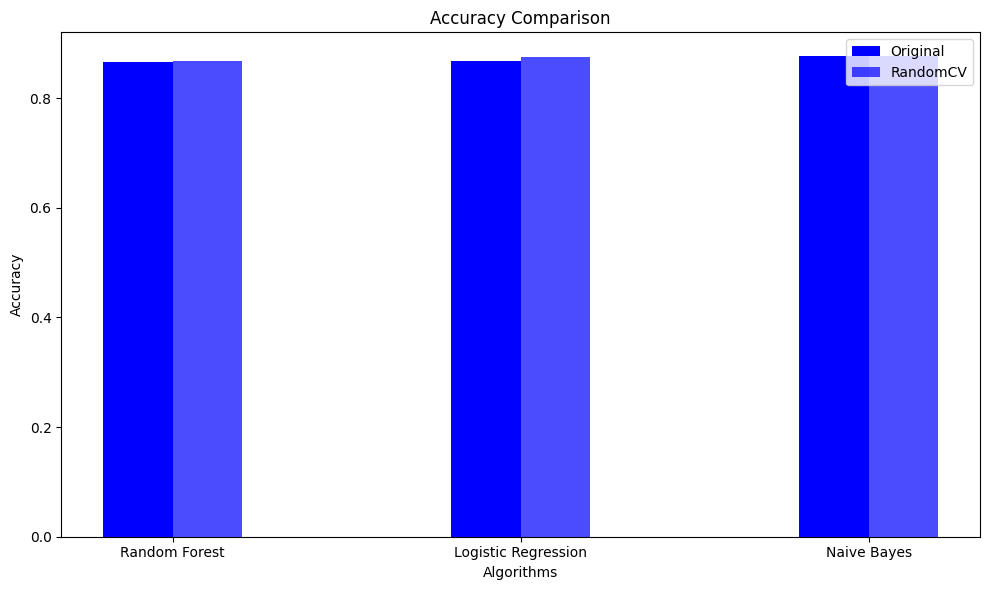

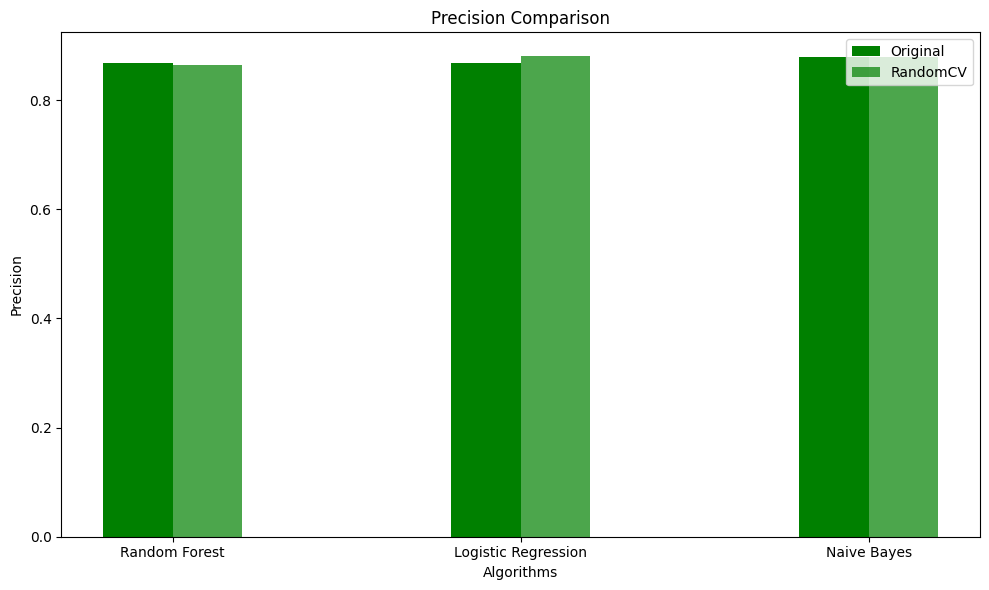

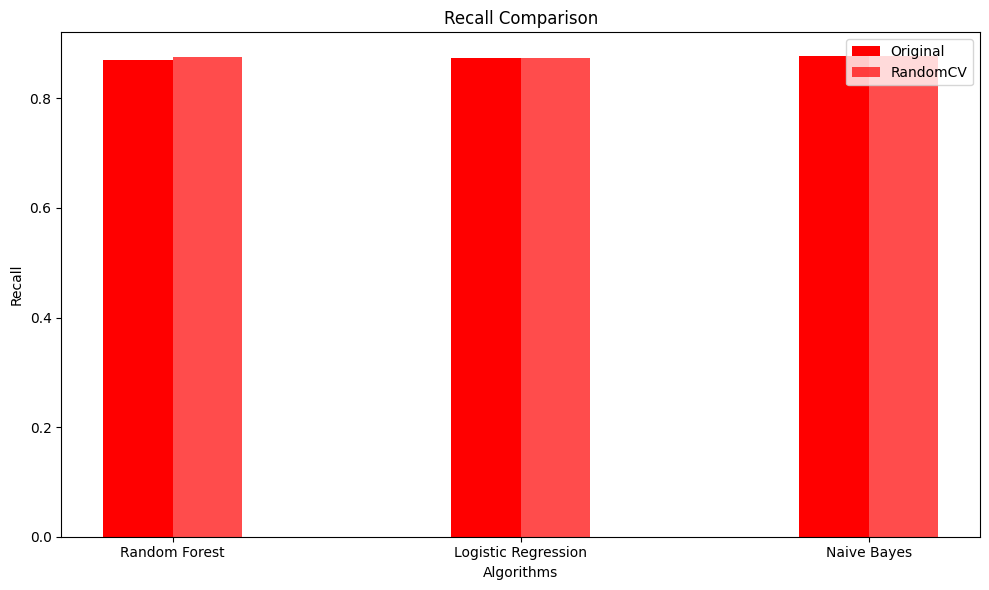

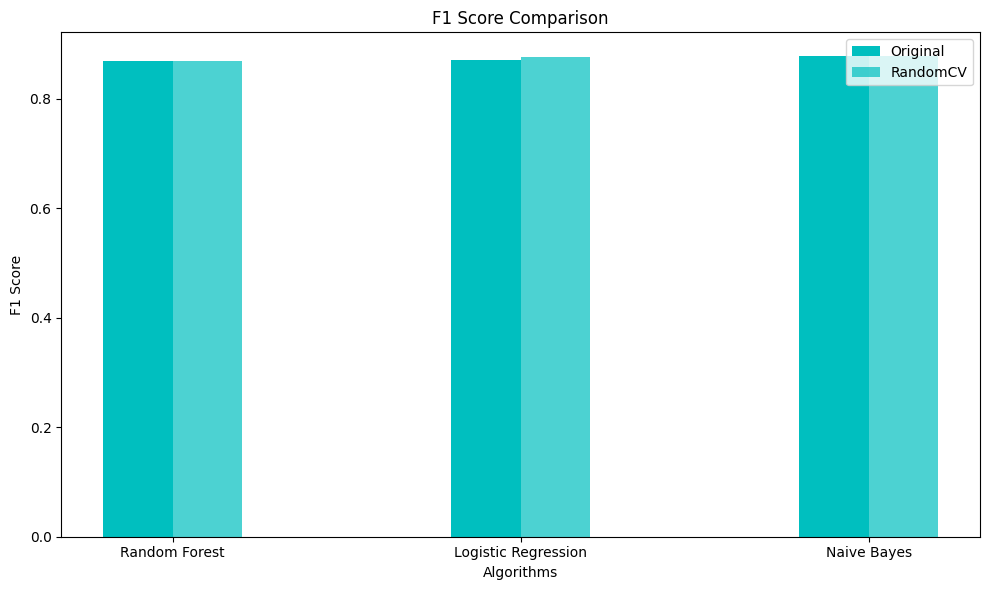

In [ ]:
# Extract algorithm names
algorithms = performance_data["Algorithm"]
num_algorithms = len(algorithms)

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colors = ['b', 'g', 'r', 'c']
width = 0.2

for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(num_algorithms), performance_data[f"Original {metric}"], width, label="Original", color=colors[i], align='center')
    plt.bar(np.arange(num_algorithms) + width, performance_data[f"RandomCV {metric}"], width, label="RandomCV", color=colors[i], alpha=0.7, align='center')
    plt.xlabel("Algorithms")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(np.arange(num_algorithms) + width/2, algorithms)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

### Inference on Test data

In [ ]:
test_rf_predictions = rf_classifier.predict(X_test)
test_lr_predictions = lr_classifier.predict(X_test)
test_nb_predictions = nb_classifier.predict(X_test)

In [ ]:
test_rf_accuracy = accuracy_score(y_test, test_rf_predictions)
test_rf_precision = precision_score(y_test, test_rf_predictions)
test_rf_recall = recall_score(y_test, test_rf_predictions)
test_rf_f1 = f1_score(y_test, test_rf_predictions)

In [ ]:
test_lr_accuracy = accuracy_score(y_test, test_lr_predictions)
test_lr_precision = precision_score(y_test, test_lr_predictions)
test_lr_recall = recall_score(y_test, test_lr_predictions)
test_lr_f1 = f1_score(y_test, test_lr_predictions)

In [ ]:
test_nb_accuracy = accuracy_score(y_test, test_nb_predictions)
test_nb_precision = precision_score(y_test, test_nb_predictions)
test_nb_recall = recall_score(y_test, test_nb_predictions)
test_nb_f1 = f1_score(y_test, test_nb_predictions)

In [ ]:
print("\nPerformance on Test Data:")

print("Random Forest:")
print(f"Accuracy: {test_rf_accuracy:.2f}")
print(f"Precision: {test_rf_precision:.2f}")
print(f"Recall: {test_rf_recall:.2f}")
print(f"F1 Score: {test_rf_f1:.2f}")

print("\nLogistic Regression:")
print(f"Accuracy: {test_lr_accuracy:.2f}")
print(f"Precision: {test_lr_precision:.2f}")
print(f"Recall: {test_lr_recall:.2f}")
print(f"F1 Score: {test_lr_f1:.2f}")

print("\nNaive Bayes:")
print(f"Accuracy: {test_nb_accuracy:.2f}")
print(f"Precision: {test_nb_precision:.2f}")
print(f"Recall: {test_nb_recall:.2f}")
print(f"F1 Score: {test_nb_f1:.2f}")



Performance on Test Data:
Random Forest:
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87

Logistic Regression:
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87

Naive Bayes:
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88


### Inference on unseen data

In [ ]:
import numpy as np

In [ ]:
def generate_unseen_data():
    unseen_data = []
    for _ in range(10):
        unseen_point = [
            np.random.normal(2.5, 0.7),
            np.random.randint(1, 30),
            np.random.randint(1, 11),
            np.random.randint(20, 120),
            np.random.uniform(0.1, 1.0),
            np.random.randint(0, 6),
            np.random.normal(4.0, 1.0),
            np.random.uniform(0.4, 0.8),
            np.random.randint(0, 4),
            np.random.randint(0, 1)
        ]
        unseen_data.append(unseen_point)
    return unseen_data

In [ ]:
unseen_data = generate_unseen_data()

In [ ]:
rf_predictions = rf_random_best_model.predict(unseen_data)
lr_predictions = lr_random_best_model.predict(unseen_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("Random Forest Predictions for Unseen Data:", rf_predictions)
print("Logistic Regression Predictions for Unseen Data:", lr_predictions)

Random Forest Predictions for Unseen Data: [1 1 1 1 1 0 1 1 1 1]
Logistic Regression Predictions for Unseen Data: [1 1 1 1 1 1 1 1 1 1]
